<a href="https://colab.research.google.com/github/Bhavya2910/Parameter_Optimization_SVM/blob/main/ParameterOptimizationSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv('/content/Occupancy_Estimation.csv')

In [18]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [20]:
data.shape

(10129, 19)

In [22]:
data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [23]:
Target=data['Room_Occupancy_Count']
print(Target)

0        1
1        1
2        1
3        1
4        1
        ..
10124    0
10125    0
10126    0
10127    0
10128    0
Name: Room_Occupancy_Count, Length: 10129, dtype: int64


In [24]:
data = data.drop(['Room_Occupancy_Count'],axis=1)

In [25]:
X = data.iloc[:,0:-1]
print(X)

             Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound

In [39]:
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
X_numeric = X.drop(non_numeric_columns, axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_numeric)


In [42]:
Samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=i)
    Samples.append((X_train, X_test, y_train, y_test))

In [43]:
Samples

[(array([[-0.58068021, -0.40262706, -0.27294904, ..., -0.57943218,
           0.00414617, -0.31474885],
         [ 0.67169215,  0.34784645,  0.75686545, ...,  1.07093859,
          -1.84475662, -0.31474885],
         [ 2.26562062,  1.09831996,  2.2079677 , ...,  2.89634868,
          -0.37884084, -0.31474885],
         ...,
         [ 1.21248931,  2.15580537,  1.03772395, ..., -0.20434791,
          -1.38913415, -0.31474885],
         [-1.12147737, -0.82903247, -1.16233429, ..., -0.57943218,
           0.00414617, -0.31474885],
         [-0.75145826, -0.70963896, -0.57721242, ..., -0.50441532,
           0.06357518, -0.31474885]]),
  array([[ 0.30167304,  0.14317186,  0.45260208, ...,  0.37078129,
          -2.16831461, -0.31474885],
         [-0.03988306, -0.18089625,  0.75686545, ..., -0.52942094,
           0.00414617, -0.31474885],
         [ 2.09484257,  0.56957726,  1.48241658, ...,  1.09594421,
           2.37140205, -0.31474885],
         ...,
         [-0.75145826, -0.60730166

In [44]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [36]:

def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

In [45]:
for i in range(len(Samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = Samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.98 Best Kernel =  poly Best Nu =  2.98 Best Epsilon =  8.69
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  2.32 Best Epsilon =  5.06
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  1.39 Best Epsilon =  0.21
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  1.11 Best Epsilon =  3.98
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  0.56 Best Epsilon =  1.67
Best Accuracy =  0.99 Best Kernel =  linear Best Nu =  9.74 Best Epsilon =  5.66
Best Accuracy =  0.99 Best Kernel =  linear Best Nu =  2.12 Best Epsilon =  4.44
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  1.1 Best Epsilon =  9.56
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  5.87 Best Epsilon =  8.07
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  3.8 Best Epsilon =  6.57


In [46]:

result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.98,poly,2.98,8.69
1,2,1.00,linear,2.32,5.06
2,3,1.00,linear,1.39,0.21
3,4,1.00,linear,1.11,3.98
4,5,1.00,linear,0.56,1.67
5,6,0.99,linear,9.74,5.66
6,7,0.99,linear,2.12,4.44
7,8,1.00,linear,1.10,9.56
8,9,0.99,poly,5.87,8.07
9,10,0.99,poly,3.80,6.57


In [48]:
X_train, X_test, y_train, y_test = Samples[result['Best Accuracy'].idxmax()]

In [49]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [50]:
train_sizes

array([  63,  192,  321,  450,  579,  708,  837,  966, 1095, 1224, 1353,
       1481, 1610, 1739, 1868, 1997, 2126, 2255, 2384, 2513, 2642, 2771,
       2900, 3029, 3157, 3286, 3415, 3544, 3673, 3802, 3931, 4060, 4189,
       4318, 4447, 4576, 4705, 4833, 4962, 5091, 5220, 5349, 5478, 5607,
       5736, 5865, 5994, 6123, 6252, 6381])

In [51]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

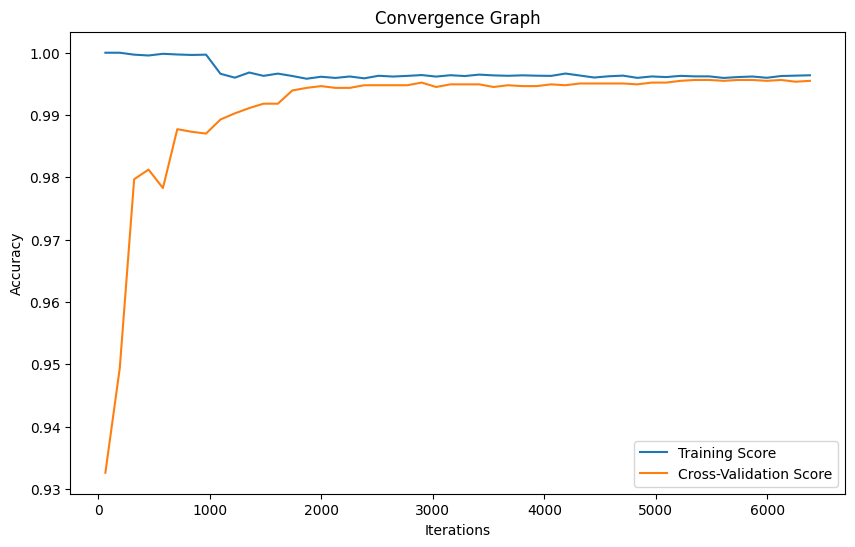

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()